# Nigerian University Dropout Risk Predictor using XGBoost

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score, r2_score,confusion_matrix, roc_auc_score,accuracy_score
import shap

## Data Preparation

In [2]:
# Loading the dataset
df = pd.read_csv('student_dataset_extended3.csv')


In [3]:
df.isna().sum()

Student_ID                  0
Age                         0
Gender                      0
Marital_Status              0
Course_Chosen               0
Application_Mode            0
Residence_Location          0
Parental_Education          0
Parental_Income_Level       0
Employment_Status           0
Semester_Enrolled_Units     0
Semester_Credited_Units     0
Semester_Evaluated_Units    0
Semester_Approved_Units     0
Semester_Average_Grade      0
Retention                   0
Unemployment_Rate           0
Inflation_Rate              0
Regional_GDP                0
Year                        0
GPA                         0
Attendance                  0
Assignment_Score            0
Course_Failures             0
LMS_Activity                0
Credit_Load                 0
dtype: int64

In [4]:
df.head()

,Student_ID,Age,Gender,Marital_Status,Course_Chosen,Application_Mode,Residence_Location,Parental_Education,Parental_Income_Level,Employment_Status,...,Unemployment_Rate,Inflation_Rate,Regional_GDP,Year,GPA,Attendance,Assignment_Score,Course_Failures,LMS_Activity,Credit_Load
0,STUD_1000,21,Other,Widowed,Management,Online,Suburban,Master,61820,Employed,...,5.6,3.7,33896,2021,4.77,71,60.9,5,147,20
1,STUD_1001,18,Female,Single,Journalism,Online,Urban,High School,80667,Part-time,...,5.0,3.9,33230,2023,4.18,62,68.7,3,54,19
2,STUD_1002,21,Other,Widowed,Agronomy,Online,Rural,PhD,73740,Unemployed,...,4.4,2.8,39899,2023,2.54,85,43.4,3,465,15
3,STUD_1003,22,Other,Single,Journalism,Online,Urban,High School,94024,Part-time,...,4.4,2.8,24286,2022,2.16,81,91.6,5,184,24
4,STUD_1004,22,Female,Married,Engineering,In-person,Rural,Master,51704,Employed,...,5.2,2.2,29604,2023,2.20,62,71.2,4,148,24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                5000 non-null   object 
 1   Age                       5000 non-null   int64  
 2   Gender                    5000 non-null   object 
 3   Marital_Status            5000 non-null   object 
 4   Course_Chosen             5000 non-null   object 
 5   Application_Mode          5000 non-null   object 
 6   Residence_Location        5000 non-null   object 
 7   Parental_Education        5000 non-null   object 
 8   Parental_Income_Level     5000 non-null   int64  
 9   Employment_Status         5000 non-null   object 
 10  Semester_Enrolled_Units   5000 non-null   int64  
 11  Semester_Credited_Units   5000 non-null   int64  
 12  Semester_Evaluated_Units  5000 non-null   int64  
 13  Semester_Approved_Units   5000 non-null   int64  
 14  Semester

In [6]:
df.describe()

,Age,Parental_Income_Level,Semester_Enrolled_Units,Semester_Credited_Units,Semester_Evaluated_Units,Semester_Approved_Units,Semester_Average_Grade,Retention,Unemployment_Rate,Inflation_Rate,Regional_GDP,Year,GPA,Attendance,Assignment_Score,Course_Failures,LMS_Activity,Credit_Load
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,26.050600,85094.488000,4.52740,3.253800,3.286800,1.613400,2.502052,0.691800,5.010180,3.011880,30004.669600,2022.002000,3.002526,74.862200,70.019820,2.481000,496.937200,17.966400
std,4.883074,37746.266947,1.70594,1.393619,1.405753,1.440679,0.863987,0.461796,0.584868,0.573537,5773.408655,0.814695,1.156030,14.752394,17.091389,1.727378,286.572498,3.724949
min,18.000000,20011.000000,2.00000,2.000000,2.000000,0.000000,1.000000,0.000000,4.000000,2.000000,20000.000000,2021.000000,1.000000,50.000000,40.000000,0.000000,0.000000,12.000000
25%,22.000000,51755.250000,3.00000,2.000000,2.000000,0.000000,1.780000,0.000000,4.500000,2.500000,24956.750000,2021.000000,1.990000,62.000000,55.300000,1.000000,248.000000,15.000000
50%,26.000000,84784.000000,5.00000,3.000000,3.000000,1.000000,2.490000,1.000000,5.000000,3.000000,30056.000000,2022.000000,3.000000,75.000000,69.800000,2.000000,494.000000,18.000000
75%,30.000000,118005.000000,6.00000,4.000000,4.000000,2.000000,3.260000,1.000000,5.500000,3.500000,34948.250000,2023.000000,4.012500,87.000000,84.700000,4.000000,740.000000,21.000000
max,34.000000,149983.000000,7.00000,7.000000,7.000000,7.000000,4.000000,1.000000,6.000000,4.000000,39996.000000,2023.000000,5.000000,100.000000,100.000000,5.000000,1000.000000,24.000000


## Feature Engineering

In [7]:
# Creating new features from existing features
df['Financial_Stress'] = df['Parental_Income_Level'] / df['Inflation_Rate'] 

df['Attendance_Compliance'] = np.where(df['Attendance'] >= 75, 1, 0)

df['Rural_Disadvantage'] = np.where(df['Residence_Location'] == 'Rural', 1, 0)


In [8]:
# Create target variable (Dropout Risk) - following research standards
df['Dropout_Risk'] = np.where(
        (df['GPA'] < 1.5) | 
        (df['Course_Failures'] > 4) | 
        (df['Attendance'] < 70), 1, 0)

## Data Preprocessing

In [9]:
# Encode categorical variables
cat_colms = ['Gender','Marital_Status', 'Course_Chosen', 'Residence_Location']
label_encoders = {}

for col in cat_colms:
    leb = LabelEncoder()
    df[col] = leb.fit_transform(df[col])
    label_encoders[col] = leb


In [10]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Marital_Status', 'Course_Chosen',
       'Application_Mode', 'Residence_Location', 'Parental_Education',
       'Parental_Income_Level', 'Employment_Status', 'Semester_Enrolled_Units',
       'Semester_Credited_Units', 'Semester_Evaluated_Units',
       'Semester_Approved_Units', 'Semester_Average_Grade', 'Retention',
       'Unemployment_Rate', 'Inflation_Rate', 'Regional_GDP', 'Year', 'GPA',
       'Attendance', 'Assignment_Score', 'Course_Failures', 'LMS_Activity',
       'Credit_Load', 'Financial_Stress', 'Attendance_Compliance',
       'Rural_Disadvantage', 'Dropout_Risk'],
      dtype='object')

In [11]:
# Selected features 
features = [
    'Age', 'Gender', 'Course_Chosen', 'Residence_Location','Semester_Average_Grade',
    'Parental_Income_Level', 'Attendance', 'Marital_Status','Course_Failures',
    'Financial_Stress', 'Attendance_Compliance', 'Rural_Disadvantage'
]

X = df[features]
y = df['Dropout_Risk']

## Train-Test Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


##  XGBoost Model Training 

In [13]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    random_state=42,
    eval_metric='auc',
    early_stopping_rounds=10  
)


In [14]:
# Train with evaluation set
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

[0]	validation_0-auc:0.90644	validation_1-auc:0.90000
[1]	validation_0-auc:0.94916	validation_1-auc:0.94283
[2]	validation_0-auc:0.94961	validation_1-auc:0.94371
[3]	validation_0-auc:0.95054	validation_1-auc:0.94601
[4]	validation_0-auc:0.95038	validation_1-auc:0.94561
[5]	validation_0-auc:0.95144	validation_1-auc:0.94541
[6]	validation_0-auc:0.95159	validation_1-auc:0.94559
[7]	validation_0-auc:0.95218	validation_1-auc:0.94556
[8]	validation_0-auc:0.95284	validation_1-auc:0.94408
[9]	validation_0-auc:0.95345	validation_1-auc:0.94462
[10]	validation_0-auc:0.95388	validation_1-auc:0.94642
[11]	validation_0-auc:0.95389	validation_1-auc:0.94644
[12]	validation_0-auc:0.95397	validation_1-auc:0.94642
[13]	validation_0-auc:0.95410	validation_1-auc:0.94639
[14]	validation_0-auc:0.95434	validation_1-auc:0.94677
[15]	validation_0-auc:0.95569	validation_1-auc:0.94814
[16]	validation_0-auc:0.95558	validation_1-auc:0.94809
[17]	validation_0-auc:0.95595	validation_1-auc:0.94770
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

## Model Evaluation

In [15]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
y_pred_new = (y_proba >= 0.2).astype(int)

## Classification Report

In [16]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       441
           1       0.98      0.89      0.93       559

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



## Confussion Matrix Display

In [17]:
conf_mx = confusion_matrix(y_test, y_pred_new)

In [18]:
conf_mx

array([[432,   9],
       [ 62, 497]], dtype=int64)

In [19]:
cmx_dsp = ConfusionMatrixDisplay(confusion_matrix = conf_mx, display_labels = ['Not At Risk', 'At Risk'])

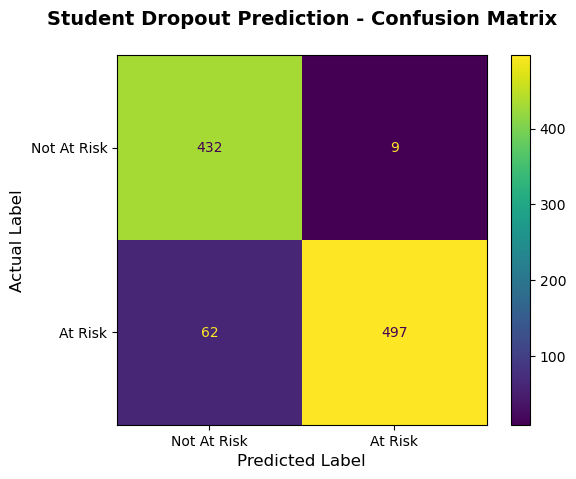

In [20]:
cmx_dsp.plot()
plt.title('Student Dropout Prediction - Confusion Matrix\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

plt.show()

In [21]:
# Evaluation Metrics
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_proba))


AUC-ROC Score: 0.9486875250994853


The Area Under the ROC Curve(AUC) is the evaluation metric used during training and validation, 
as it is useful for imbalanced classification

In [22]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## The Coefficient Of Determination(R2)

In [23]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

In [24]:
print(f"Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")
print(f"Train RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")

Train R²: 0.753, Test R²: 0.736
Train RMSE: 0.247, Test RMSE: 0.255


The R2 is a statistical measure indicating how well the model explains the variance of the target variable.
It ranges from 0 to 1, values is closer to 1 indicates better fit while values closer to 0 indicates poor fit.
Therefor, a high R2 indicates that the model learned the data training data well.

## Feature Importance Plot

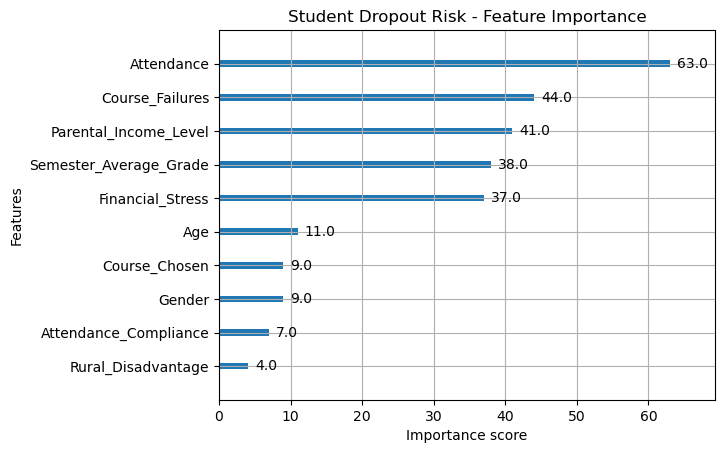

In [25]:
# Top 10 Feature Importance
xgb.plot_importance(model, max_num_features=10)
plt.title('Student Dropout Risk - Feature Importance')
plt.show()

In [26]:
# Your confusion matrix data
cmx = np.array([[438  , 3],
               [ 63, 496]])

In [27]:
# Calculate metrics
total = np.sum(cmx)
accuracy = np.trace(cmx) / total
precision = cmx[1,1] / (cmx[1,1] + cmx[0,1]) if (cmx[1,1] + cmx[0,1]) > 0 else 0
recall = cmx[1,1] / (cmx[1,1] + cmx[1,0]) if (cmx[1,1] + cmx[1,0]) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


In [28]:
accuracy

0.934

In [29]:
cmx[1,1] / (cmx[1,1] + cmx[0,1])

0.9939879759519038

In [30]:
cmx[1,1] + cmx[0,1]

499

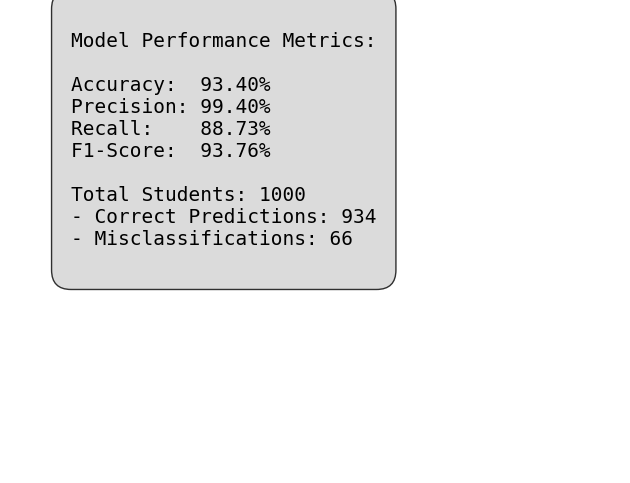

In [31]:
# Add metrics text box
metrics_txt = f"""
Model Performance Metrics:

Accuracy:  {accuracy:.2%}
Precision: {precision:.2%}
Recall:    {recall:.2%}
F1-Score:  {f1_score:.2%}

Total Students: {total}
- Correct Predictions: {np.trace(cmx)}
- Misclassifications: {total - np.trace(cmx)}
"""

plt.text(0.1, 0.9, metrics_txt, fontsize=14, family='monospace',
         bbox=dict(boxstyle="round,pad=1.0", facecolor="lightgray", 
        edgecolor="black", alpha=0.8))
plt.axis('off')

plt.tight_layout()
plt.show()

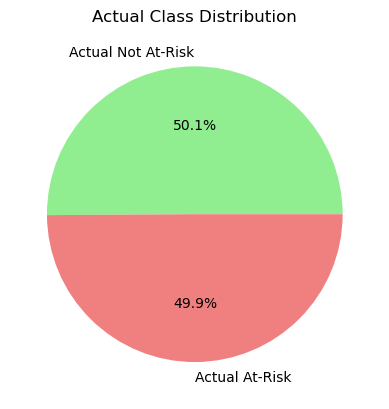

In [32]:
# Class distribution
class_distribution = [cmx[0,0] + cmx[1,0], cmx[0,1] + cmx[1,1]]
plt.pie(class_distribution, labels=['Actual Not At-Risk', 'Actual At-Risk'], 
        autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Actual Class Distribution')
plt.show()

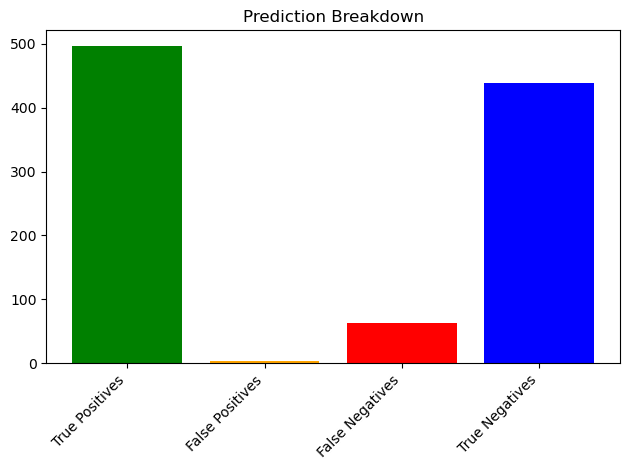

In [33]:
# Error analysis
error_types = ['True Positives', 'False Positives', 'False Negatives', 'True Negatives']
error_counts = [cmx[1,1], cmx[0,1], cmx[1,0], cmx[0,0]]
colors = ['green', 'orange', 'red', 'blue']

plt.bar(error_types, error_counts, color=colors)
plt.title('Prediction Breakdown')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [34]:
print(f"\n Model successfully identified {cmx[1,1]} at-risk students")
print(f"\n {cmx[1,0]} at-risk students were missed (False Negatives)")
print(f"\n {cmx[0,0]} safe students correctly classified")


 Model successfully identified 496 at-risk students

 63 at-risk students were missed (False Negatives)

 438 safe students correctly classified


In [35]:
# Save model in compatible format
model.get_booster().save_model('compatible_model.json') 

In [36]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
# Also save the feature names for reference
import json
feature_names = list(X.columns)
with open('model_features.json', 'w') as f:
    json.dump(feature_names, f)
print("✅ Feature names saved as 'model_features.json'")

✅ Feature names saved as 'model_features.json'


## Example Prediction

In [37]:
new_student = {
    'Age': 22,
    'Gender': 'Female',
    'Course_Chosen': 'Engineering',
    'Residence_Location': 'Rural',
    'Parental_Income_Level': 50000,
    'Attendance': 30,
    'Course_Failures': 2,
    'Marital_Status': 'Single',
    'Semester_Average_Grade' : 2.10
}


In [38]:
# Preprocess
new_df = pd.DataFrame([new_student])
for col in cat_colms:
    new_df[col] = label_encoders[col].transform(new_df[col])


In [39]:
# Add engineered features
new_df['Financial_Stress'] = new_df['Parental_Income_Level'] / df['Inflation_Rate']
new_df['Attendance_Compliance'] = np.where(new_df['Attendance'] >= 75, 1, 0)
new_df['Rural_Disadvantage'] = np.where(new_df['Residence_Location'] == 'Rural', 1, 0)


In [40]:
# Predict
risk = model.predict(new_df[features])
risk_proba = model.predict_proba(new_df[features])[:, 1][0]

In [41]:
print(f"\nPredicted Dropout Risk: {'HIGH RISK' if risk[0] == 1 else 'LOW RISK'}")
print(f"Probability: {risk_proba:.2%}")


Predicted Dropout Risk: HIGH RISK
Probability: 96.14%


In [42]:
previous performance metrics
model performance metrics:
Accuracy:  82.30
Precision:  100.00
Recall:     64.67
F1-Score:   78.55
Total Students: 1000
Correct predictions: 823
Misclassifications: 177

SyntaxError: invalid syntax (3739188898.py, line 1)

In [ ]:
@"
Flask==2.3.3
Flask-SQLAlchemy==3.0.5
Flask-Login==0.6.2
Flask-WTF==1.1.1
Flask-Mail==0.9.1
python-dotenv==1.0.0
pandas==2.0.3
numpy==1.24.3
scikit-learn==1.3.0
xgboost==1.7.6
joblib==1.3.2
gunicorn==21.2.0
"@ | Out-File -FilePath "requirements.txt" -Encoding UTF8

In [ ]:
print(f"   - Resources can be focused on truly at-risk students")
print(f"   - These need manual review and additional monitoring")
print(f"   - Potential dropouts prevented with early intervention")

In [ ]:
# Additional detailed analysis
print("="*60)
print("DETAILED PERFORMANCE ANALYSIS")
print("="*60)

print(f"\n📊 Overall Accuracy: {accuracy:.2%}")
print(f"✅ Correctly Identified: {np.trace(cm)} students")
print(f"❌ Misclassified: {total - np.trace(cm)} students")

print(f"\n🎯 Precision (At-Risk): {precision:.2%}")
print("   - When model predicts 'At-Risk', how often it's correct")

print(f"\n🔍 Recall (Sensitivity): {recall:.2%}")
print("   - What percentage of actual at-risk students were identified")

print(f"\n⭐ F1-Score: {f1_score:.2%}")
print("   - Balance between Precision and Recall")

# Breakdown by class
safe_precision = cm[0,0] / (cm[0,0] + cm[1,0]) if (cm[0,0] + cm[1,0]) > 0 else 0
safe_recall = cm[0,0] / (cm[0,0] + cm[0,1]) if (cm[0,0] + cm[0,1]) > 0 else 0

print(f"\n{'='*40}")
print("CLASS-WISE PERFORMANCE")
print(f"{'='*40}")

print(f"\n🏫 Safe Students (Class 0):")
print(f"   - Precision: {safe_precision:.2%}")
print(f"   - Recall: {safe_recall:.2%}")
print(f"   - Correct: {cm[0,0]}/{cm[0,0] + cm[1,0]}")

print(f"\n🚨 At-Risk Students (Class 1):")
print(f"   - Precision: {precision:.2%}")
print(f"   - Recall: {recall:.2%}")
print(f"   - Correct: {cm[1,1]}/{cm[1,1] + cm[1,0]}")

In [ ]:
pip install --upgrade pip

In [ ]:
pip install lightgbm 